In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("./Month_Value_1.csv")
df['Period'] = pd.to_datetime(df['Period'], format="%d.%m.%Y")
df.set_index('Period', inplace=True)
df = df.dropna()

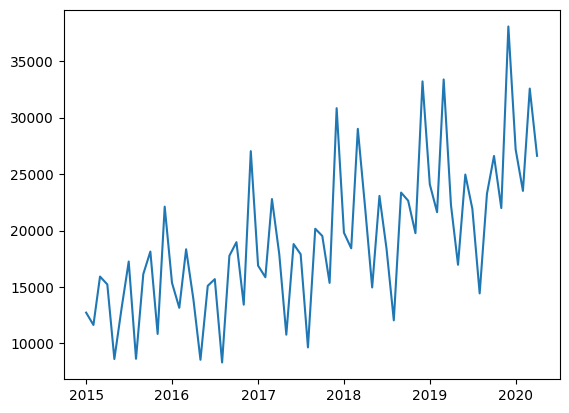

In [4]:
plt.plot(df['Sales_quantity'])
plt.show()

In [7]:
result = adfuller(df['Sales_quantity'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 1.157056206094537
p-value: 0.9956753282590142


In [8]:
df_diff = df['Sales_quantity'].diff().dropna()
result = adfuller(df_diff)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -9.02300082504805
p-value: 5.7081705061833116e-15


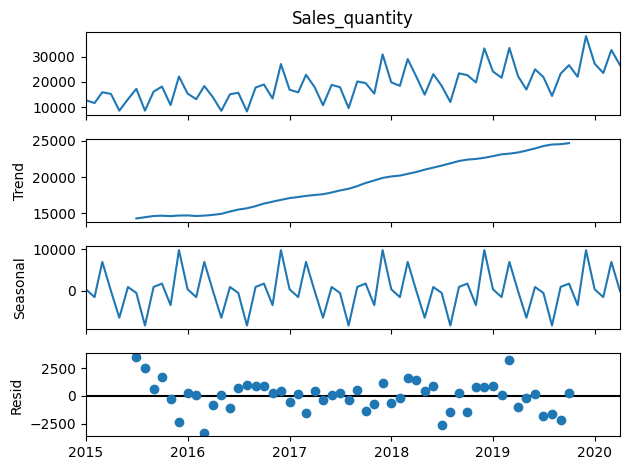

In [13]:
decomposed = seasonal_decompose(df['Sales_quantity'], model='additive')
decomposed.plot()
plt.show()

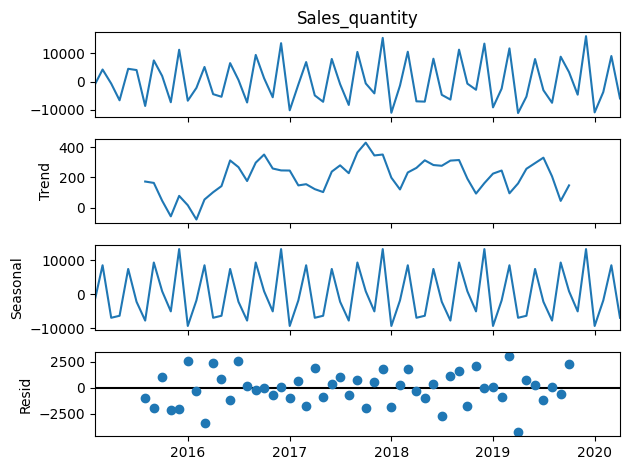

In [14]:
decomposed = seasonal_decompose(df_diff, model='additive')
decomposed.plot()
plt.show()  

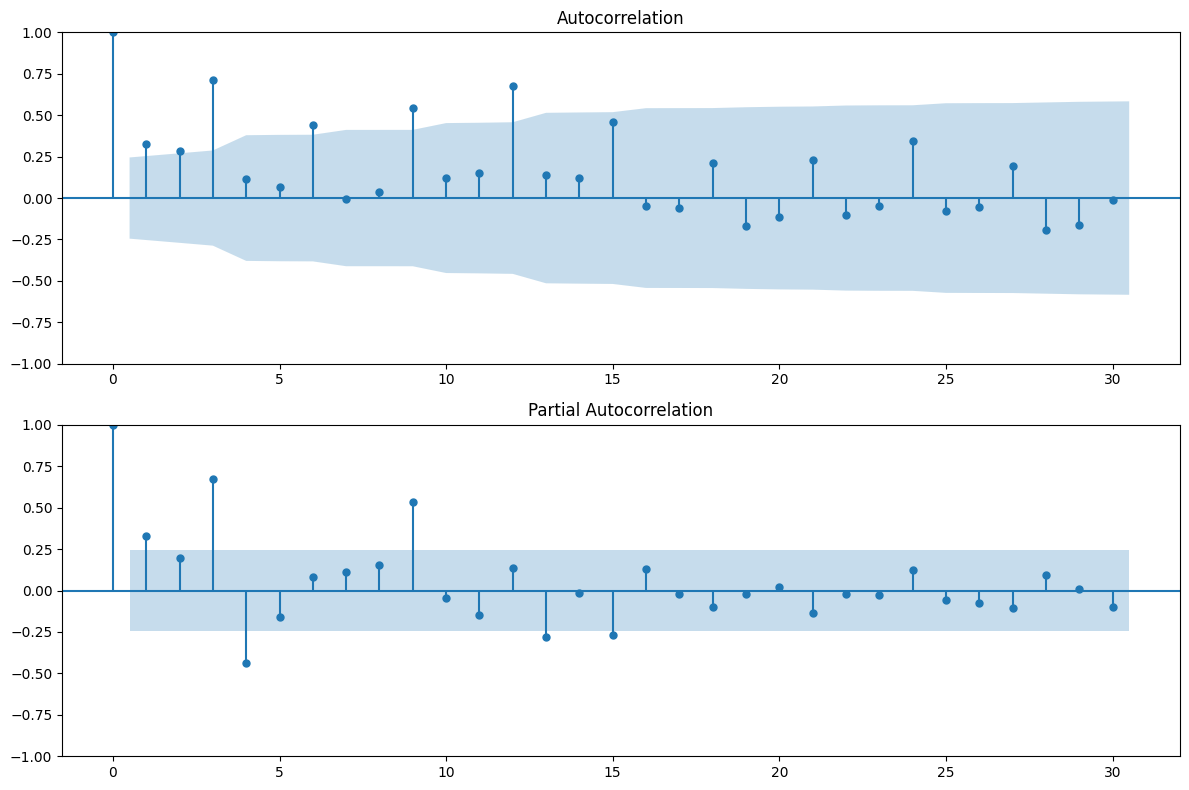

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Sales_quantity'], lags=30, ax=axes[0])
plot_pacf(df['Sales_quantity'], lags=30, ax=axes[1])
plt.tight_layout()
plt.show()